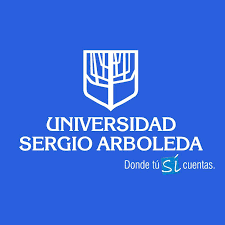

###***Integrantes:***

* Santiago Niño
* Esteban Rodriguez
* Daniel Velasquez
* Laura Ojeda

###***Taller - Auto - Organización***

Auto - organización como método Pres ll.

	Definir el método de AutoOrganización, para controlar el tráfico de Datos en Internet.
		Representación
		Modelamiento - Bi-grafos
		Simulación
		Aplicación
		Evaluación

App -> Optimizar el BW de los canales


###***Introducción:***

En el vasto e interconectado mundo de Internet, el control eficiente del flujo de datos es esencial para garantizar un rendimiento óptimo y una experiencia de usuario satisfactoria. Sin embargo, la complejidad inherente a la red de redes, con millones de dispositivos interconectados y una variedad de servicios y aplicaciones en constante evolución, presenta desafíos significativos para los ingenieros de redes y los administradores de sistemas.

En respuesta a estos desafíos, ha surgido el concepto de autoorganización como un enfoque prometedor para gestionar el tráfico de datos de manera más eficiente y adaptable. La autoorganización se basa en la idea de que los sistemas complejos pueden regularse a sí mismos mediante la interacción entre sus componentes individuales, sin necesidad de una supervisión centralizada.

En el contexto del control de tráfico de datos en Internet, la autoorganización implica el desarrollo de algoritmos y técnicas que permitan a los dispositivos de red coordinarse entre sí de manera dinámica y autónoma para optimizar el uso de los recursos de la red y mejorar la calidad del servicio para los usuarios finales.

Este enfoque ofrece varias ventajas, incluida la capacidad de adaptarse a cambios en la topología de la red, la carga de tráfico variable y las condiciones de operación en tiempo real, sin requerir intervención manual por parte de los administradores de la red.

En esta presentación/taller, exploraremos el concepto de autoorganización en el contexto específico del control de tráfico de datos en Internet. Abordaremos aspectos como la representación del tráfico de datos mediante modelos de grafos, el diseño y la simulación de algoritmos de autoorganización, y su aplicación práctica en la optimización del ancho de banda de los canales de comunicación.

A través de ejemplos prácticos y simulaciones en Python, examinaremos cómo la autoorganización puede ofrecer soluciones innovadoras para los desafíos actuales en la gestión del tráfico de datos en Internet, y cómo estas técnicas pueden aplicarse de manera efectiva en entornos reales para mejorar el rendimiento y la eficiencia de las redes de comunicación modernas.

Esta introducción proporciona una visión general del tema y establece el contexto para la discusión más detallada que seguirá en el taller sobre autoorganización en el control de tráfico de datos en Internet.

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random

###***Representación:***

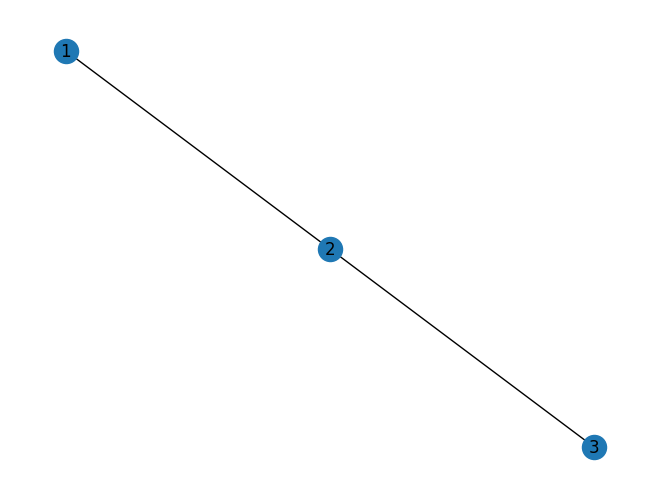

In [ ]:
import networkx as nx

# Crear un grafo para representar la red de comunicación
G = nx.Graph()
# Agregar nodos
G.add_nodes_from([1, 2, 3])
# Agregar aristas
G.add_edges_from([(1, 2), (2, 3)])

# Visualizar el grafo
nx.draw(G, with_labels=True)


###***Modelamiento - Bi-grafos:***

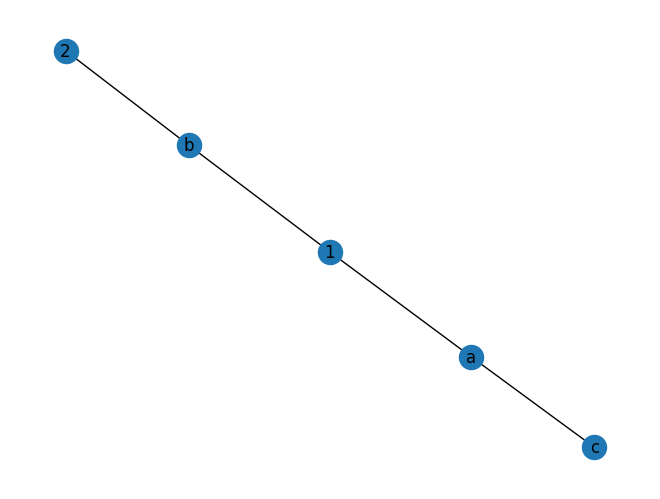

In [ ]:
import networkx as nx

# Crear un bi-grafo
B = nx.Graph()
# Agregar nodos bipartitos
B.add_nodes_from([1, 2], bipartite=0)  # Primer conjunto de nodos
B.add_nodes_from(['a', 'b', 'c'], bipartite=1)  # Segundo conjunto de nodos
# Agregar aristas
B.add_edges_from([(1, 'a'), (1, 'b'), (2, 'b'), ('a', 'c')])

# Visualizar el bi-grafo
nx.draw(B, with_labels=True)


###***Simulación:***

In [ ]:
!pip install simpy


In [ ]:
import simpy

# Definir la función del proceso de simulación
def proceso(env):
    while True:
        # Implementar lógica de tráfico de datos
        yield env.timeout(1)  # Simular un intervalo de tiempo

# Configurar y ejecutar la simulación
env = simpy.Environment()
env.process(proceso(env))
env.run(until=10)  # Simular durante 10 unidades de tiempo


###***Aplicación:***

In [ ]:
import numpy as np
from scipy.optimize import minimize

# Definir una función objetivo para optimizar el ancho de banda
def funcion_objetivo(x):
    # Lógica de optimización (puede ser cualquier función que represente la eficiencia del ancho de banda)
    return np.sum(x)

# Definir las restricciones
restricciones = ({'type': 'eq', 'fun': lambda x: sum(x) - 1})  # La suma de todos los canales de ancho de banda es igual a 1

# Inicializar los valores iniciales de los canales de ancho de banda
x0 = np.array([0.5, 0.5])

# Realizar la optimización
resultado = minimize(funcion_objetivo, x0, constraints=restricciones)

print("Ancho de banda óptimo por canal:", resultado.x)


Ancho de banda óptimo por canal: [0.5 0.5]


###***Evaluación:***

In [ ]:
# Supongamos que tienes dos listas que representan el ancho de banda antes y después de la optimización
ancho_de_banda_antes = [10, 20, 15, 25]
ancho_de_banda_despues = [8, 18, 12, 22]

# Calcular la diferencia en el ancho de banda para cada canal
diferencia_ancho_de_banda = [antes - despues for antes, despues in zip(ancho_de_banda_antes, ancho_de_banda_despues)]

# Calcular la mejora total del ancho de banda
mejora_total = sum(diferencia_ancho_de_banda)

# Calcular el porcentaje de mejora
porcentaje_mejora = (mejora_total / sum(ancho_de_banda_antes)) * 100

print("Mejora total del ancho de banda:", mejora_total)
print("Porcentaje de mejora:", porcentaje_mejora, "%")


Mejora total del ancho de banda: 10
Porcentaje de mejora: 14.285714285714285 %


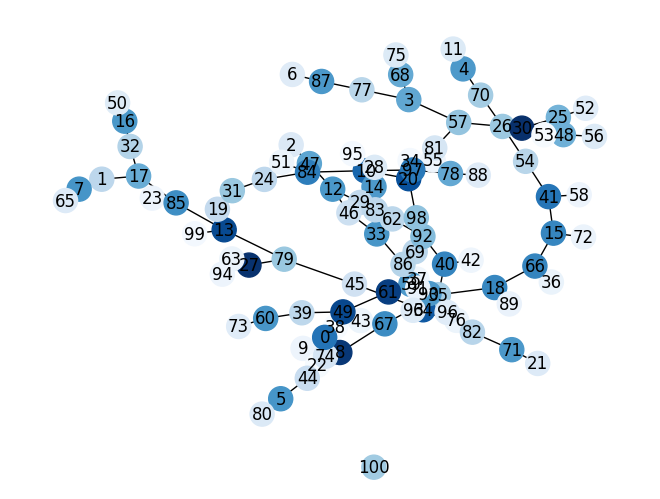

In [ ]:
def representacion_internet():
    # Representación del grafo de Internet
    internet = nx.Graph()

    # Agregar nodos representando dispositivos en Internet
    internet.add_nodes_from(range(1, 101))  # Por ejemplo, 100 dispositivos

    # Conectar nodos aleatoriamente (para simplificar)
    internet.add_edges_from(nx.random_tree(100).edges())

    return internet

def modelamiento_trafico_datos(internet):
    # Inicialización de atributos 'traffic' para cada nodo
    for node in internet.nodes():
        internet.nodes[node]['traffic'] = 0

    # Simulación de tráfico de datos
    for i in range(1000):  # 1000 pasos de simulación
        # Control de tráfico de datos
        for node in internet.nodes():
            neighbors = list(internet.neighbors(node))
            if neighbors:  # Si el nodo tiene vecinos
                selected_neighbor = random.choice(neighbors)
                # Transferencia de datos entre el nodo y su vecino seleccionado
                # (En esta simulación, simplemente se transfiere una unidad de datos)
                internet.nodes[node]['traffic'] -= 1
                internet.nodes[selected_neighbor]['traffic'] += 1

    return internet

def simulacion_trafico_datos():
    internet = representacion_internet()
    internet_con_trafico = modelamiento_trafico_datos(internet)

    # Visualización del grafo de Internet después de la simulación
    node_colors = [internet_con_trafico.nodes[node]['traffic'] for node in internet_con_trafico.nodes()]
    nx.draw(internet_con_trafico, with_labels=True, node_color=node_colors, cmap=plt.cm.Blues)
    plt.show()

# Ejecutar la simulación
simulacion_trafico_datos()

**Nodos:**
* Los nodos del grafo representan dispositivos en la red de Internet, como computadoras, servidores, enrutadores, etc.
En este caso, se agregan nodos numerados del 1 al 100 para representar estos dispositivos.

**Conexiones entre nodos:**
* Las conexiones entre nodos representan las conexiones físicas o lógicas entre dispositivos en la red.
Para simplificar, se utilizó la función nx.random_tree() de NetworkX para generar un árbol aleatorio. Esto significa que cada nodo está conectado a un nodo padre, formando una estructura de árbol.
El árbol aleatorio asegura que todos los nodos estén conectados de alguna manera y evita la presencia de bucles o ciclos en el grafo.

**Estructura del grafo:**

* El grafo generado es un grafo no dirigido, lo que significa que las conexiones entre los nodos no tienen una dirección específica.
Cada nodo puede estar conectado a uno o más nodos vecinos, pero no hay una estructura de red específica que se refleje en la generación aleatoria del grafo.